In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df = pd.read_csv("/content/retail_sales_dataset.csv")

In [36]:
df.head(12)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [38]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [39]:
df = df.drop_duplicates()
df.shape

(1000, 9)

In [40]:
df["Date"] = pd.to_datetime(df["Date"])   # change "Date" to your real column name

In [41]:
df["Sales"] = df["Quantity"] * df["Price per Unit"]

In [42]:
df.groupby("Product Category")["Sales"].sum().sort_values(ascending=False).head(5)


,Sales
Product Category,
Electronics,156905
Clothing,155580
Beauty,143515


In [43]:
df["Month"] = df["Date"].dt.month
df.groupby("Month")["Sales"].sum()


,Sales
Month,
1,36980
2,44060
3,28990
4,33870
5,53150
6,36715
7,35465
8,36960
9,23620


In [44]:
df.groupby("Date")["Sales"].sum()


,Sales
Date,
2023-01-01,3600
2023-01-02,1765
2023-01-03,600
2023-01-04,1240
2023-01-05,1100
...,...
2023-12-27,700
2023-12-28,2075
2023-12-29,3400


In [45]:
df.to_csv("/content/cleaned_sales.csv", index=False)

**Daily Sales Line Chart**

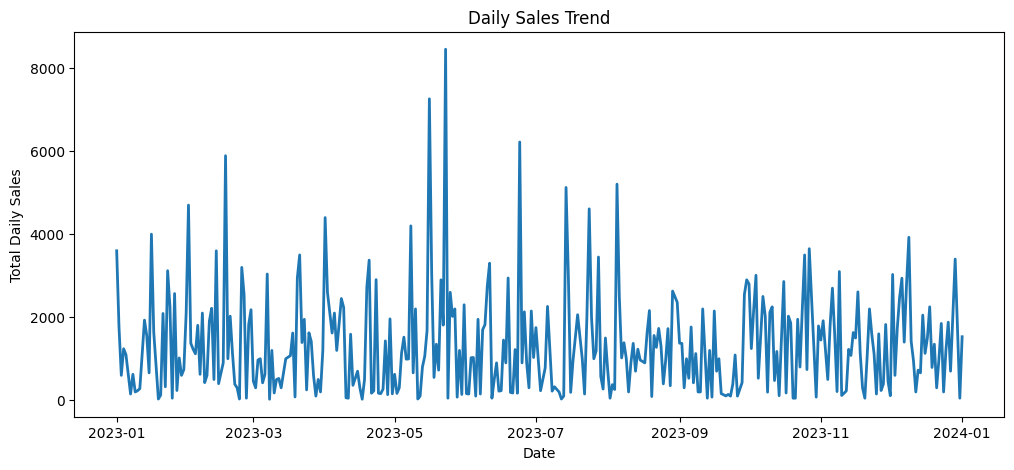

In [46]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales["Date"], daily_sales["Sales"], marker="", linewidth=2)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Daily Sales")
plt.show()

**SALES BY MONTH**

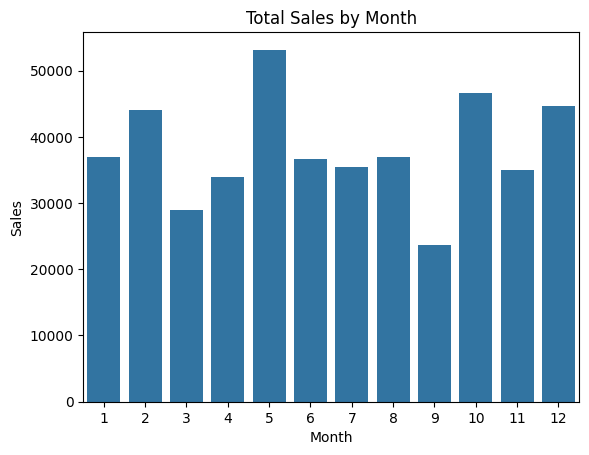

In [47]:
monthly_sales = df.groupby("Month")["Sales"].sum().reset_index()

sns.barplot(x="Month", y="Sales", data=monthly_sales)
plt.title("Total Sales by Month")
plt.show()

**TOP 5 PRODUCT CATEGORI BY SALES**

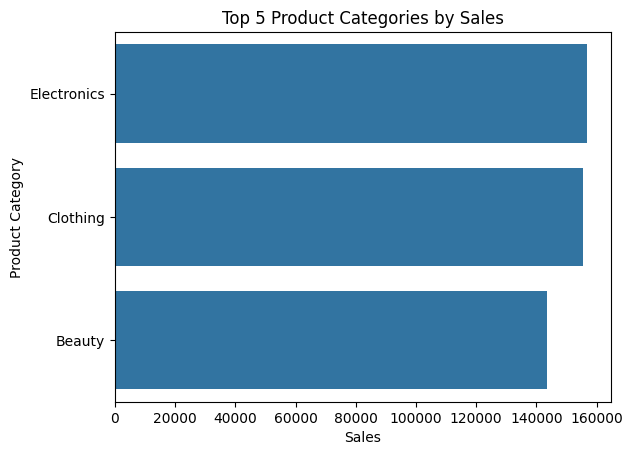

In [48]:
top_categories = df.groupby("Product Category")["Sales"].sum().sort_values(ascending=False).head(5)

sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 5 Product Categories by Sales")
plt.xlabel("Sales")
plt.ylabel("Product Category")
plt.show()

**SALES BY THE GENDER**

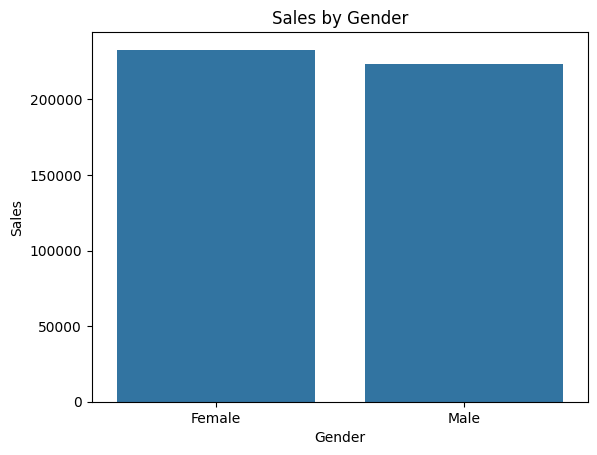

In [49]:
gender_sales = df.groupby("Gender")["Sales"].sum().reset_index()

sns.barplot(x="Gender", y="Sales", data=gender_sales)
plt.title("Sales by Gender")
plt.show()

**CUSTOMER AGE DISTRIBUTION**

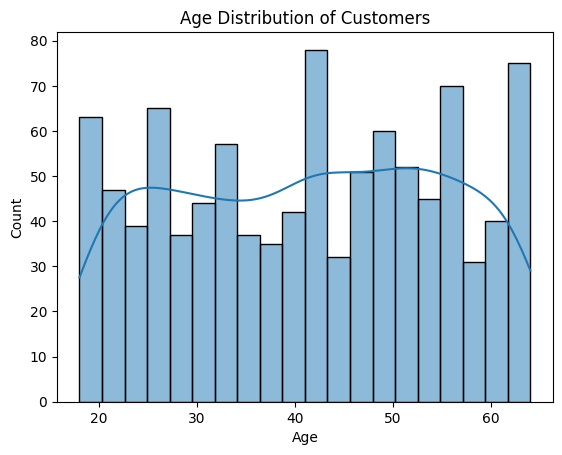

In [50]:
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.show()

**QUANTITY SOLD BY PRODUCT**

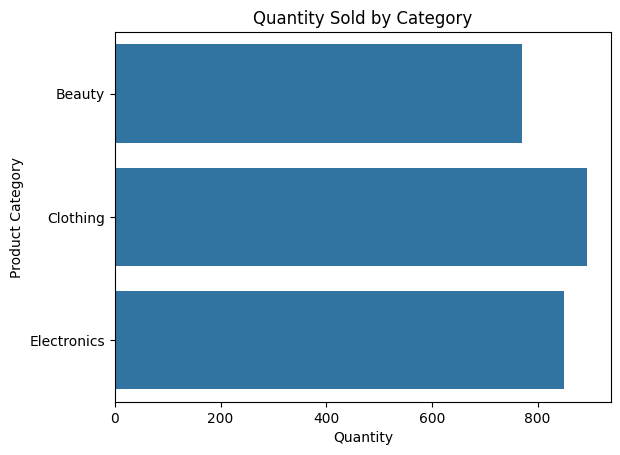

In [51]:
qty_by_cat = df.groupby("Product Category")["Quantity"].sum().reset_index()

sns.barplot(x="Quantity", y="Product Category", data=qty_by_cat)
plt.title("Quantity Sold by Category")
plt.show()
